In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
palette = sns.color_palette("Spectral")

In [119]:
df=pd.read_csv('data.csv',header=0)
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,NaN,12669.0,9656.0,7561,214,2674,1
1,2.0,3.0,7057.0,9810.0,9568,1762,3293,1
2,NaN,3.0,6353.0,8808.0,7684,2405,3516,1
3,1.0,3.0,13265.0,1196.0,4221,6404,507,1
4,2.0,3.0,22615.0,NaN,7198,3915,1777,1


### DATA EXPLORATION

In [120]:
print(df.shape)

(445, 8)


In [121]:
columns=list(df.columns)
columns

['Channel',
 'Region',
 'Fresh',
 'Milk',
 'Grocery',
 'Frozen',
 'Detergents_Paper',
 'Delicassen']

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Channel           443 non-null    float64
 1   Region            443 non-null    float64
 2   Fresh             443 non-null    float64
 3   Milk              443 non-null    float64
 4   Grocery           445 non-null    int64  
 5   Frozen            445 non-null    int64  
 6   Detergents_Paper  445 non-null    int64  
 7   Delicassen        445 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 27.9 KB


In [123]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,443.000000,443.000000,443.000000,443.000000,445.000000,445.000000,445.000000,445.000000
mean,1.325056,2.546275,12068.688488,5822.169300,7985.020225,3046.869663,2896.573034,0.939326
std,0.468925,0.772551,12671.218578,7367.912535,9463.196438,4834.482936,4747.244632,0.239000
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,0.000000
25%,1.000000,2.000000,3119.500000,1532.000000,2157.000000,688.000000,263.000000,1.000000
50%,1.000000,3.000000,8533.000000,3634.000000,4814.000000,1504.000000,825.000000,1.000000
75%,2.000000,3.000000,17001.500000,7251.500000,10790.000000,3527.000000,4003.000000,1.000000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,1.000000


### DATA CLEANING

In [124]:
df.drop(['Channel','Region'], axis = 1, inplace = True,errors='ignore')

In [125]:
print("COLUMN DATATYPES:")
print(df.dtypes)

COLUMN DATATYPES:
Fresh               float64
Milk                float64
Grocery               int64
Frozen                int64
Detergents_Paper      int64
Delicassen            int64
dtype: object


In [126]:
df.dtypes.value_counts()

int64      4
float64    2
Name: count, dtype: int64

In [127]:
#DROPPING COLUMNS
#str_cols = list(df.columns)
#str_cols.remove('coln_name')
 
#df = df.drop(['col',col2'],axis=1)
  
#To_drop = ['Edition Statement','Corporate Author']
#df.drop(to_drop, inplace=True, axis=1)

#columns=['','']
#df.drop(columns=to_drop, inplace=True)


In [128]:
print("MISSING VALUES")
print(df.isnull().mean())
#print(df.isnull().sum())


MISSING VALUES
Fresh               0.004494
Milk                0.004494
Grocery             0.000000
Frozen              0.000000
Detergents_Paper    0.000000
Delicassen          0.000000
dtype: float64


In [129]:
#FILLING MISSING VALUES
#columns=['Channel','Region']
#for column in columns:
#    df[columns]=df[columns].fillna("")


# Removing the mising values
df = df.dropna(axis = 0)
print(df.isnull().sum())

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [130]:
#To check for duplicates
df.duplicated().value_counts()

False    436
True       5
Name: count, dtype: int64

In [131]:
df = df.drop_duplicates()
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561,214,2674,1
1,7057.0,9810.0,9568,1762,3293,1
2,6353.0,8808.0,7684,2405,3516,1
3,13265.0,1196.0,4221,6404,507,1
6,12126.0,3199.0,6975,480,3140,1
...,...,...,...,...,...,...
435,29703.0,12051.0,16027,13135,182,1
436,39228.0,1431.0,764,4510,93,1
437,14531.0,15488.0,30243,437,14841,1
438,10290.0,1981.0,2232,1038,168,1


In [132]:
#TO SEE DATA IN PARTICULAR LOCATION
#df.loc[206]

### OUTLIER DETECTION AND REMOVING

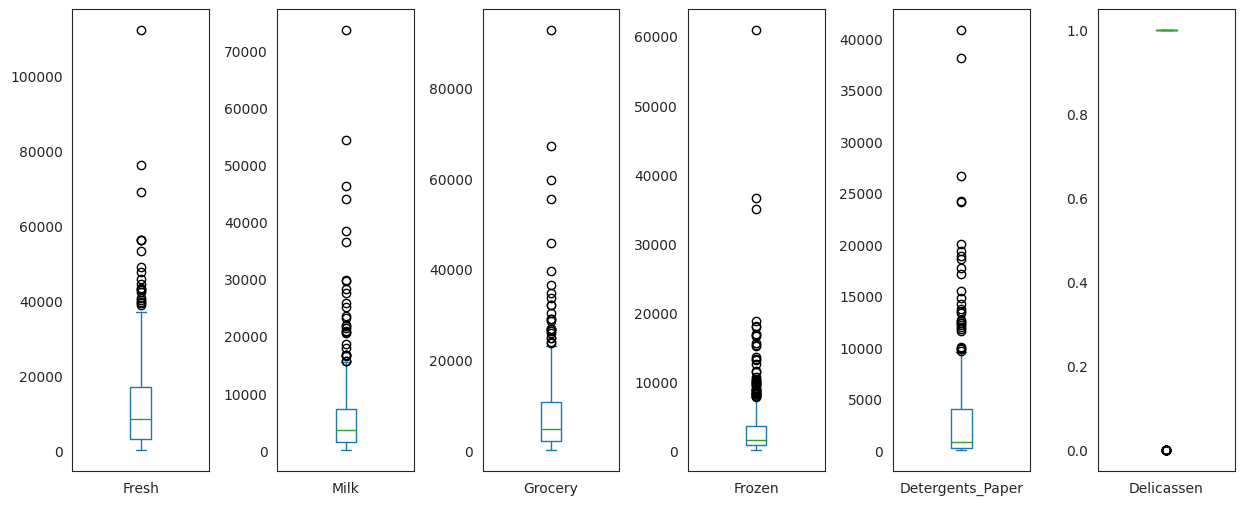

In [133]:
# Checking for outliers using boxplots
df.plot(kind='box', subplots=True, sharey=False, figsize=(15, 6))

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

In [134]:
 #Function to remove outliers

def remove_outliers(dff,columns,n_std):
    for col in columns:
        mean = dff[col].mean()
        sd = dff[col].std()
        dff = dff[(dff[col] <= mean+(n_std*sd))]
    return dff


In [135]:
columns = df.columns
columns = columns[:-1]
columns

Index(['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper'], dtype='object')

In [136]:
good_data= remove_outliers(df, columns, 2)
good_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561,214,2674,1
1,7057.0,9810.0,9568,1762,3293,1
2,6353.0,8808.0,7684,2405,3516,1
3,13265.0,1196.0,4221,6404,507,1
6,12126.0,3199.0,6975,480,3140,1
...,...,...,...,...,...,...
432,21117.0,1162.0,4754,269,1328,1
433,1982.0,3218.0,1493,1541,356,1
434,16731.0,3922.0,7994,688,2371,1
438,10290.0,1981.0,2232,1038,168,1


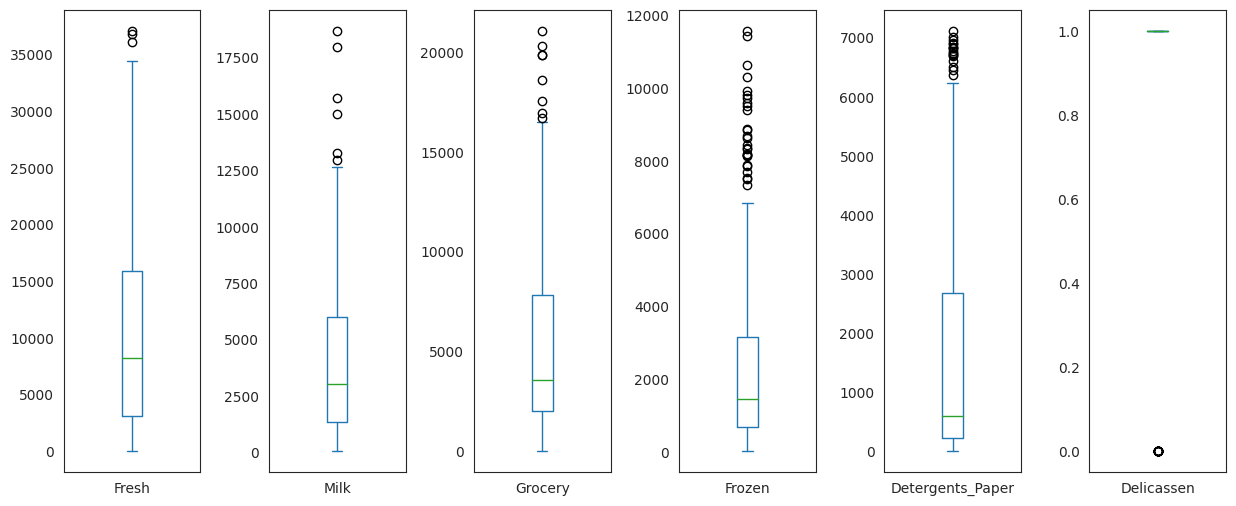

In [137]:
# Checking for outliers using boxplots
good_data.plot(kind='box', subplots=True, sharey=False, figsize=(15, 6))

# increase spacing between subplots
plt.subplots_adjust(wspace=0.5) 
plt.show()

### DATA BALANCING

In [138]:
from sklearn.utils import shuffle
df = shuffle(df)

In [139]:
hic = df[:25]

In [140]:
#X = hic.drop(['Delicassen'],axis=1)
#y = hic['Delicassen'].values
X = df.drop(['Delicassen'], axis=1)
y = df.Delicassen

In [141]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

In [142]:
X_smote.insert(5, "Delicassen", y_smote, True)
new_df = X_smote
new_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6269.000000,1095.000000,1980,3860,609,1
1,2344.000000,10678.000000,3828,1439,1566,1
2,37036.000000,7152.000000,8253,2995,20,0
3,18840.000000,1371.000000,3135,3001,352,1
4,22925.000000,73498.000000,32114,987,20070,1
...,...,...,...,...,...,...
813,40663.415916,582.759386,3094,1097,370,0
814,375.547165,493.851081,2091,521,155,0
815,822.004175,12489.009690,25232,758,7378,0
816,15378.847951,3012.562647,5672,414,2777,0


In [143]:
import numpy as np

# Create example feature and target datasets with different numbers of samples
X = np.random.rand(826, 10)
y = np.random.randint(0, 2, size=440)

# Split the feature and target datasets to have the same number of samples
n_samples = min(X.shape[0], y.shape[0])
X = X[:n_samples, :]
y = y[:n_samples]


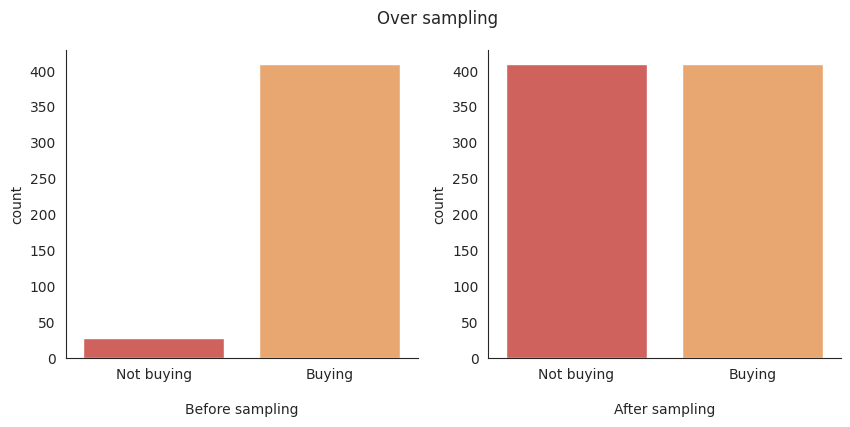

In [144]:
sns.set_style("white")
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Delicassen', palette=palette)
plt.xticks([0,1], ['Not buying', 'Buying'])
plt.xlabel("\nBefore sampling")

plt.subplot(1, 2, 2)
sns.countplot(data=new_df, x='Delicassen', palette=palette)
plt.xticks([0,1], ['Not buying', 'Buying'])
plt.xlabel("\nAfter sampling")

plt.suptitle('Over sampling \n\n\n')

sns.despine()

In [145]:
new_df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,6269.000000,1095.000000,1980,3860,609,1
1,2344.000000,10678.000000,3828,1439,1566,1
2,37036.000000,7152.000000,8253,2995,20,0
3,18840.000000,1371.000000,3135,3001,352,1
4,22925.000000,73498.000000,32114,987,20070,1
...,...,...,...,...,...,...
813,40663.415916,582.759386,3094,1097,370,0
814,375.547165,493.851081,2091,521,155,0
815,822.004175,12489.009690,25232,758,7378,0
816,15378.847951,3012.562647,5672,414,2777,0


In [146]:
X = new_df.iloc[:,:-1].values
y = new_df.iloc[:,-1].values

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
category = "Delicassen"
new_data = new_df

# TODO: Split the data into training and testing sets using the given feature as the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### DATA TRANSFORMATION

In [148]:
#FEATURE SCALING
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


In [149]:
correlation = new_data.corr()
print(correlation['Delicassen'])  # relationship between data and strength

Fresh               0.180295
Milk                0.188427
Grocery             0.090792
Frozen              0.218690
Detergents_Paper    0.087106
Delicassen          1.000000
Name: Delicassen, dtype: float64


In [150]:
# Dimensionality Reduction using Kernel PCA
from sklearn.decomposition import KernelPCA
pca = KernelPCA(n_components = 3, kernel = 'rbf')
X = pca.fit_transform(X)
X = pd.DataFrame(X)
X

,0,1,2
0,-0.002445,-0.001835,-0.001774
1,-0.002445,-0.001835,-0.001774
2,-0.002445,-0.001835,-0.001774
3,-0.002445,-0.001835,-0.001774
4,-0.002445,-0.001835,-0.001774
...,...,...,...
813,-0.002445,-0.001835,-0.001774
814,-0.002445,-0.001835,-0.001774
815,-0.002445,-0.001835,-0.001774
816,-0.002445,-0.001835,-0.001774


#### BUILDING SUPPORT VECTOR MACHINE MODEL

In [151]:
from sklearn.svm import SVR # for non linear model
svr = SVR(kernel = 'rbf')  # radial basis to know similarities btw objects
svr.fit(X_train, y_train)

SVR()

In [152]:
y_pred = svr.predict(X_test)
y_pred = y_pred.round(1) # rounding to one decimal places

#### BUILDING RANDOM FOREST MODEL

In [153]:
from sklearn.ensemble import RandomForestRegressor  # fits mul DT on random subset and avg's pred for best accuracy
 
regressor = RandomForestRegressor()
 
regressor.fit(X_train,y_train) 

RandomForestRegressor()

In [154]:
z_pred = regressor.predict(X_test)
z_pred=  z_pred.round(1)

In [155]:
avg = ((y_pred+z_pred)/2)
avg = avg.round(1)

## FETCHING THE TEST DATA

### SUPPORT VECTOR MODEL

In [156]:
predictions = np.column_stack((y_pred, y_test))
predictions = pd.DataFrame(predictions, columns=['Predicted', 'Actual'])

predictions

,Predicted,Actual
0,0.9,0.0
1,0.5,1.0
2,0.5,1.0
3,0.2,0.0
4,0.8,1.0
...,...,...
159,0.7,1.0
160,1.0,1.0
161,0.3,0.0
162,0.6,1.0


### RANDOM FOREST MODEL

In [157]:
predictions = np.column_stack((z_pred, y_test))
predictions = pd.DataFrame(predictions, columns=['Predicted', 'Actual'])

predictions

,Predicted,Actual
0,0.1,0.0
1,0.6,1.0
2,0.9,1.0
3,0.1,0.0
4,0.8,1.0
...,...,...
159,0.9,1.0
160,0.9,1.0
161,0.2,0.0
162,0.9,1.0


In [158]:
predictions = np.column_stack((avg, y_test))
predictions = pd.DataFrame(predictions, columns=['Predicted', 'Actual'])

predictions

,Predicted,Actual
0,0.5,0.0
1,0.6,1.0
2,0.7,1.0
3,0.2,0.0
4,0.8,1.0
...,...,...
159,0.8,1.0
160,1.0,1.0
161,0.2,0.0
162,0.8,1.0


## ACCURACY CALCULATION

### SUPPORT VECTOR MODEL

In [186]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('S-squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.325
Mean Squared Error: 0.19445121951219516
Root Mean Squared Error: 0.4409662339819174
S-squared: 0.21800837320574185


### RANDOM FOREST MODEL

In [160]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, z_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, z_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, z_pred)))
print('R-squared:', metrics.r2_score(y_test, z_pred))
rfm=metrics.r2_score(y_test, z_pred)



Mean Absolute Error: 0.22865853658536586
Mean Squared Error: 0.10481707317073169
Root Mean Squared Error: 0.32375464965113887
R-squared: 0.5784748803827753


### AVERAGE

In [187]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, avg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, avg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, avg)))
print('A-squared:', metrics.r2_score(y_test, avg))

Mean Absolute Error: 0.2719512195121951
Mean Squared Error: 0.12719512195121951
Root Mean Squared Error: 0.356644251252168
A-squared: 0.48848086124401935


In [162]:
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics

In [163]:
X

,0,1,2
0,-0.002445,-0.001835,-0.001774
1,-0.002445,-0.001835,-0.001774
2,-0.002445,-0.001835,-0.001774
3,-0.002445,-0.001835,-0.001774
4,-0.002445,-0.001835,-0.001774
...,...,...,...
813,-0.002445,-0.001835,-0.001774
814,-0.002445,-0.001835,-0.001774
815,-0.002445,-0.001835,-0.001774
816,-0.002445,-0.001835,-0.001774


### SVC

In [164]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)

SVC(kernel='linear', random_state=1)

In [165]:
# Make the predictions
y_predict = svc.predict(X_test_std)
SVC_ACCU =accuracy_score(y_test, y_predict)
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.677


### KNN MODEL

In [166]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [167]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [168]:
knn5.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [169]:
from sklearn.metrics import accuracy_score
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)
KNN_5=accuracy_score(y_test, y_pred_5)
KNN_1=accuracy_score(y_test, y_pred_1)

Accuracy with k=5 81.70731707317073
Accuracy with k=1 81.09756097560977


## CONFUSION MATRIX

In [170]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [171]:
def confusion_metrics (conf_matrix):
# save confusion matrix and slice into four pieces
    TP = conf_matrix[0][0]
    TN = conf_matrix[1][1] 
    FP = conf_matrix[0][1] 
    FN = conf_matrix[1][0]     
    # calculate accuracy
    conf_accuracy = (float (TP+TN) / float(TP + TN + FP + FN))
    
    # calculate error rate
    conf_error = 1- conf_accuracy
    
    # calculate the sensitivity
    conf_sensitivity = (TP / float(TP + FN))
    # calculate the specificity
    conf_specificity = (TN / float(TN + FP))
    
    # calculate precision
    conf_precision = (TP / float(TP + FP))

    # calculate recall
    recall = (TP / float(TP + FN))
    
    # calculate f_1 score
    conf_f1 = 2 * ((conf_precision * conf_sensitivity) / (conf_precision + conf_sensitivity))
    
    print(f'Accuracy: {round(conf_accuracy,2)}') 
    print(f'Mis-Classification: {round(conf_error,2)}') 
    print(f'Sensitivity: {round(conf_sensitivity,2)}') 
    print(f'Specificity: {round(conf_specificity,2)}') 
    print(f'Precision: {round(conf_precision,2)}')
    print(f'Recall: {round(recall,2)}')
    print(f'f_1 Score: {round(conf_f1,2)}')

In [172]:
tree = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
tree = tree.fit(X_train, y_train)

In [173]:
y_test_pred = tree.predict(X_test)
y_test_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

In [174]:
tree_test = accuracy_score(y_test, y_test_pred)
tree_test

0.823170731707317

In [175]:
cm = confusion_matrix(y_test, y_test_pred)
cm

array([[72, 16],
       [13, 63]])

In [176]:
confusion_metrics(cm)

Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.85
Specificity: 0.8
Precision: 0.82
Recall: 0.85
f_1 Score: 0.83


In [177]:
confusion_metrics(cm)

Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.85
Specificity: 0.8
Precision: 0.82
Recall: 0.85
f_1 Score: 0.83


### KNN_5 ACCURACY

In [178]:
tree_test_5 = accuracy_score(y_test, y_pred_5)
tree_test_5

0.8170731707317073

In [179]:
cm = confusion_matrix(y_test, y_pred_5)
cm

array([[73, 15],
       [15, 61]])

In [180]:
confusion_metrics(cm)

Accuracy: 0.82
Mis-Classification: 0.18
Sensitivity: 0.83
Specificity: 0.8
Precision: 0.83
Recall: 0.83
f_1 Score: 0.83


### KNN_1 ACCURACY

In [181]:
tree_test_1 = accuracy_score(y_test, y_pred_1)
tree_test_1

0.8109756097560976

In [182]:
cm = confusion_matrix(y_test, y_pred_1)
cm

array([[73, 15],
       [16, 60]])

In [183]:
confusion_metrics(cm)

Accuracy: 0.81
Mis-Classification: 0.19
Sensitivity: 0.82
Specificity: 0.8
Precision: 0.83
Recall: 0.82
f_1 Score: 0.82


Text(0, 0.5, 'Accuracy')

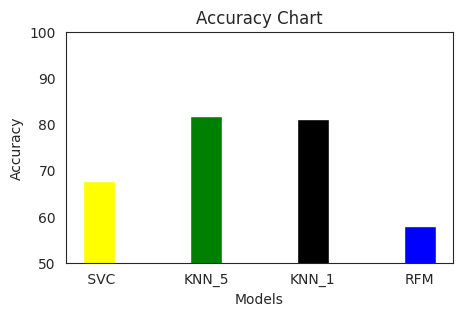

In [184]:
# Plotting the accuracy of models implemented
xaxis = [" SVC" , "KNN_5" , "KNN_1","RFM"]
yaxis = [SVC_ACCU*100 , tree_test_5*100 , tree_test_1*100,rfm*100]
plt.figure(figsize=(5, 3), dpi=100)
plt.ylim(ymin=50,ymax=100)
plt.bar(xaxis , yaxis , color=['yellow','green','black','blue'], width = 0.3)

plt.title("Accuracy Chart")
plt.xlabel("Models")
plt.ylabel("Accuracy")